# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:10px 10px;">Pandas Tips and Ticks</p>

<div class="alert alert-info" role="info">
Tricks with <b>emojis</b> must <b>NOT</b> be <b>missed</b>
</div>



<div class="alert alert-success" role="alert">

<p>
<li>The purpose of this NB is to showcase <b>top 20% tricks</b> that can help us in <b>80% of our Data analysis task</b> </li><br>
<li> I have added only the imp <b>Practical</b> Tips and Tricks from Pandas and not the fancy ones</li> <br>
<li> This NB is <b>not restricted</b> to only <b>optimized tips</b>, I have tried adding all imp. ones </li><br>
<li> I still feel there a tons of tricks I am unaware about, please feel free to suggest</li>
    
</p>
    
</div>

-----------
- with so many tips, there could be a possibility of a few mistakes, please share the feedback. I'll be happy to fix them

# TOC

- [display](#1)

- [☑️side-by-side Dataframes](#2)

- [Apply vs Applymap](#3)

- [🏆String "NA" = Null in read_csv](#3a)

- [Groupby-transform](#4)
    - [Applications of transform](#4.1)
    

- [Rank, diff, cumsum,cumcount, nth, nlargest, etc](#5)

- [Query and Eval](#6)

- [Insert & Assign](#7)

- [set-options, reset-options](#8)

- [🏅Get, Truncate](#9)

- [Shift, Rolling](#10)

- [Pandas - Data reading options](#11)

- [Crosstab vs Pivot_table](#12)

- [Explode, Expand, Melt](#13)

- [📌Groupby Tips](#14)
    - [Groupby - unique / set / list](#14.1)
    - [Groupby - filter](#14.2)
    - [Groupby - get-group](#14.3)
    - [Groupby-describe](#14.4)
    

- [Avoid multi-index in groupby](#15)

- [Progress apply](#16)

- [💥Filter & idxmax/idxmin](#16a)

- [Assignment vs Copy](#17)

- [Memory usage](#18)

- [Iterrows vs Itertuple](#19)

- [🤖Where, Mask](#20)

- [💯Imp. params we generally miss](#21)
    - [value_counts(normalize = True)](#21.1)
    - [value_counts(dropna = False)](#21.2)
    - [confusion matrix(normalize = True)](#21.3)
    - [describe(category = True)](#21.4)
    - [merge indicator](#21.5)
    - [dropna with threhold](#21.6)
    - [Save compressed files](#21.7)
    
- [Sklearn datasets](#22)
    - [Real datasets](#22.1)
    - [Toy datasets](#22.2)
    - [Dummy data - for ML tasks](#22.3)

- [Pandas cut/qcut](#23)
    
- [pandas map](#24)

- [sort_index](#25) 

- [to-markdown, to-clipboard, to-dict](#26)

- [🎯Flattening a python list](#27)

- [Append](#28)

- [⚕️String vs object vs Category dtype](#29)

- [🔥Fuguesql : SQL in pandas](#30)

- [🚀Pandarallel](#31)

- [Dataframe - style](#32)

- [⚡Markdown](#33)

- [☑️Searborn formatting in Matplotlib plots](#34)

- [Pandas profiling](#35)

- [To be continued](#36)

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display

<a id = "1"> </a>

# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Display</p>

- Want to view both dataframes in 1 cell, **Dont use print, use display**

In [ ]:
df1  = pd.DataFrame({"col1" : [1,2,3,4] , "col2" : list("abcd")})
df2  = pd.DataFrame({"col1" : [5,6,7,8] , "col2" : list("pqrs")})

display(df1.T)

display(df2.T)

<a id = "2"> </a>

# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">☑️Side by Side DataFrames</p>

- Latest Pandas updates have made it easy in displaying `side by side` dataframes 

In [ ]:
from IPython.display import display_html 

In [ ]:
df1  = pd.DataFrame({"col1" : [1,2,3,4] , "col2" : list("abcd")})
df2  = pd.DataFrame({"col1" : [5,6,7,8] , "col2" : list("pqrs")})

In [ ]:
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption("df1")
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption("df2")

space = "\xa0" * 10

display_html(df1_styler._repr_html_()+ space + df2_styler._repr_html_(), raw=True)

<a id = "3"> </a>

# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Apply vs Applymap</p>



- We all know about **Apply**, what about **Applymap**

- The difference is simple 
    - `Apply :` works along an axis (either rows or cols)
    - `Applymap :` works across each element in dataframe

In [ ]:
df = pd.DataFrame({"A" : ["abcd","pqr","fgd","a"], "B" : list("abcd")})
df

#### Apply(axis = 0)
> **`calculates length across columns :: # rows`**

In [ ]:
df.apply(len, axis = 0).to_frame()

#### Apply(axis = 1)
> **`calculates length across rows :: # columns`**

In [ ]:
df.apply(len, axis = 1).to_frame()

#### Applymap
> **`Calculates length of each element in DF`**

In [ ]:
df.applymap(len)

<a id = "3a"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> 🏆String "NA" = Null in read_csv</p>

- One important thing to keep a note of in **Pandas.read_csv** method is `string values like"NA","#NA", etc` entries.
- These entries are read as **nulls (np.nan)** while we read a csv using pd.read_csv
- This is very imp to know else we might make mistake in our `feature engg.` process
-----------------

I have written about it earlier here
> https://www.kaggle.com/getting-started/304468

<a id = "4"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Groupby Transform</p>

- Have you used partitions in sql, transform does something like that

- for those who are not sql person, let me explain

`groupby-Transform` performs aggregations in `similar` manner as that of groupby but the output is shown at `index levels`

In [ ]:
df = pd.DataFrame({"A" : list("aaabbc") , "B" : [1,2,3,4,5,6]})
df

#### Groupby `without` Transforms

In [ ]:
df.groupby("A")[["B"]].agg(len)

#### Groupby `with` Transforms

> **`Output is calculated at each index level`**

In [ ]:
df["count_B"] = df.groupby("A")[["B"]].transform(len)
df[["A","count_B"]]

<a id = "4.1"> </a>
#### Application of transform

- Lets discuss a couple of practical applications of `transform`

- **`% share` of col-B  grouped on col-A**

> This can also be done by calc the group mean first & then merging it back

In [ ]:
print("Percentage share of col-B for each group in col-A")
df["col_B_perc"] = df["B"]*100/df.groupby("A")["B"].transform("sum")
df

- **`Category mean` imputation in col-B**

> imputing the missing values in `column-B` with `grouped mean` (grouped on column-A categories)

In [ ]:
print("Original frame")
df = pd.DataFrame({"A" : list("aaabbbcc") , "B" : [1,2,np.nan,4,5,np.nan,6,7]})
display(df)

print()

# imputing the values in column-B with mean of categories
print("Imputed frame")
df.groupby("A")[["B"]].transform(lambda x:x.fillna(x.mean()))

<a id = "5"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Rank, diff, cumsum,cumcount, nth, nlargest, etc</p> 

- One very common sql/python Data anlaysis question is **Ranking within a group [RWG]**
- As the name suggests, RWG ranks elements for each `category/group`

---------------------
one very popular interview questions on this concept 
> `For each quarter obtain the nth max sales  ?`

In [ ]:
np.random.seed(123)

df = pd.DataFrame({"Quarter" : ("Q1 "*3+"Q2 "*3+"Q3 "*3+"Q4 "*3).split(),
                   "Month" : ["jan","feb", "mar","apr", "may" ,"june" 
                              ,"july" ,"aug" ,"sep" ,"oct","nov","dec"] 
                   , "Sale" : np.arange(12)*1000})
df

<div class="alert alert-success" role="alert">
We are applying each function on <b> grouped data </b> (on Quarter) basis. However, they can be without any groupings too 
</div>

### cumcount : `for RWG`

- creates a `counter` on the data 
- used for calculating `rank` for each quarter

-----------
- since the `Sale` is already sorted we can directly use `cumcount`  for obtaining `rank`, else we need to sort data first

In [ ]:
df["RWG_cumcount"] = df.groupby('Quarter').cumcount(ascending = True) + 1
df

### rank : `for RWG`
- calculates the `rank` for the given column (`sale`) for `each quarter`

-----------
**Method** arg settles ties:

- `average`: average rank of the group
- `min`: lowest rank in the group
- `max`: highest rank in the group
- `first`: ranks assigned in order they appear in the array
- `dense`: like ‘min’, but rank always increases by 1 between groups.

In [ ]:
df["RWG_rank"] = df.groupby("Quarter")["Sale"].rank(method = "dense").astype(int)
df

### n_largest
- Calculate the n-largest values
- In this case we are calculating upto `2nd-max` sale for `each Quarter`

In [ ]:
df.groupby("Quarter")["Sale"].nlargest(2).to_frame()

### cumsum
- calculates `cumulative sum` for a column
- using it to calculate the `cumulative sale` for `each quarter`

In [ ]:
df["cum_sale_quarter"] = df.groupby("Quarter")["Sale"].cumsum()
df[["Quarter","Sale","cum_sale_quarter"]]

### diff 
- diff calculates difference b/w **subsequent elements** in a column with specified **period**
- `diff` takes `period` as argument (1 in this case)

In [ ]:
df["sale_inc_for_quarter_month"] = df.groupby("Quarter").Sale.diff(1)
df[["Quarter","Sale","sale_inc_for_quarter_month"]]

<a id = "6"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Query and Eval</p>

#### Query and Eval are used for `data-filtering` and `data-transformations` in dataframe

- **Why Query & Eval**

> They offers a `cleaner interface` for writing conditions based on mulitple columns

> They offers `better performance` 

------------------

ref : https://queirozf.com/entries/pandas-query-examples-sql-like-syntax-queries-in-dataframes

### Query

- `Query` is used for filtering `dataframe` 
- Query also offers `cleaner interface`  & `better performance` compared to conventional pandas filtering

In [ ]:
sales_data = pd.DataFrame({"company" : list("aabbc"),
                   "sales" : [100,200,300,400,500],
                   "date" : pd.date_range("2021-01-01", "2021-01-5")})
sales_data

In [ ]:
# using pandas default filtering 
print("filtering using pandas default method")
display(sales_data[(sales_data.company == "b") 
           & (sales_data.sales > 200) 
           & (sales_data.sales < 500)])


print()

# query code appears cleaner 
print("filtering using Query function")
display(sales_data.query("company == 'b' \
                         and sales > 200 \
                         and sales < 500"))

### Eval

- Eval is used for doing `transformations` on dataframe (unlike filtering in query)
- Uses similar backend as `query` 

------------

**Imp points**

> To benefit from using eval() you need to install `numexpr`

> You should `not` use eval() for simple expressions or for expressions involving small DataFrames. In fact, eval() is many orders of magnitude slower for smaller expressions/objects than plain ol’ Python. 

`A good rule of thumb is to only use eval() when you have a DataFrame with more than 10,000 rows.`

In [ ]:
pip install numexpr -q

In [ ]:
sales_data = pd.DataFrame({"company" : list("aabbc"),
                   "sales" : [100,200,300,400,500],
                   "date" : pd.date_range("2021-01-01", "2021-01-5")})
sales_data

In [ ]:
print("adding constant to sales")

inc = 250
sales_data["sales_inc"] = sales_data.eval("sales + @inc")
sales_data

### Query and Eval Tips

- All `commands` and `operator` shown below for `Query` can be used for `Eval` too

In [ ]:
# built in functions - for query
print("built in functions - for query")
display(sales_data.query("sqrt(sales) > 20"))

In [ ]:
# using date `dt` accessors
print("using date `dt` accessors")
display(sales_data.query("date.dt.day > 2"))


In [ ]:
# using @ for condition basis some variable
print("using `@` for condition basis some variable")
sales_cut = 300
display(sales_data.query("sales > @sales_cut"))


In [ ]:
# using `not` for negation for a condition
print("using `not` for negation for a condition")
sales_cut = 300
display(sales_data.query("not(sales > @sales_cut)"))

<a id = "7"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Insert & Assign</p>

### Insert

- By default pandas would add the columns to the `extreme right` in a DF. 
- If we want to add the column in a particular index, we can use **insert**

In [ ]:
df = pd.DataFrame({"A" : list("abcd"), "B" : [3,5,6,6]})
df

In [ ]:
# adding column C to index 1 (2nd position) 
df.insert(1,"C", df.B + 1)

print("column C added to index 1 (2nd position)")
df

### Assign

- Assign lets you create `multiple columns` within the same assign command
- Creates a new DataFrame with the `new columns` in addition to all the `existing columns`

In [ ]:
df = pd.DataFrame({'temp_c': [17.0, 25.0]},
                  index=['Portland', 'Berkeley'])
df

In [ ]:
df.assign(temp_f=lambda x: x['temp_c'] * 9 / 5 + 32,
          temp_k=lambda x: (x['temp_f'] +  459.67) * 5 / 9)

<a id = "8"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;"> set-options, reset-options</p>

- Okay, lets say you have too many columns and rows and you wanna view them all at once
- One option could be to use **pandas.set_options**

In [ ]:
# default basis the editor
df = pd.DataFrame(np.random.rand(100,50))
df

### Set_option
- **`Lets change the default value`**

In [ ]:
# there are many other options to choose from!
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)

In [ ]:
# output after changing defaults
print("We can see all 50 cols since limit is 100")
df

### Reset_option
- **`Reset the value to default`**

In [ ]:
pd.reset_option('display.max_columns')

In [ ]:
print("We are back to default # column view")
df

- **`Another very useful trick!`**

> Whenever a dataframe has 60+ rows, we can fix the minimum no. of rows to view by use **min_row** instead of calling `df.head` everytime `(saves space)!!`

In [ ]:
pd.set_option("min_rows" , 3)

In [ ]:
df

<a id = "9"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🏅Get, Truncate</p>

### Get

- Get item from object for given key (ex: `DataFrame column`)
- Returns `default value` if not found

--------------------

- `Get` can be very `handy` (in production systems) where we might `not get some columns` in data because of some issues
- `Get` does not return `error` but a `deatult` value

--------------------

- **Get `for pandas dataframe`**

In [ ]:
df = pd.DataFrame(
    [
        [24.3, 75.7, "high"],
        [31, 87.8, "high"],
        [22, 71.6, "medium"],
        [35, 95, "medium"],
    ],
    columns=["temp_celsius", "temp_fahrenheit", "windspeed"],
    index=pd.date_range(start="2014-02-12", end="2014-02-15", freq="D"),
)

df

In [ ]:
df.get(["temp_celsius", "windspeed"])

In [ ]:
print("returns default_value if column is not present")
df.get(["temp_celsius", "temp_kelvin"], default="default_value")

- **Get `for dictionary`**

In [ ]:
dict_ = {"A" : "abcd", "B" : [5,6,7,8] , "C" : [1,2,3,4]}
dict_

In [ ]:
dict_.get("Q", "default")

### Truncate

- `Truncate` a Series or DataFrame `before` and `after` some index value.
- This is a useful shorthand for boolean indexing based on index values above or below certain thresholds

---------------

> `Truncate` is really helpful to filter incase of large number of columns 

In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'c', 'd', 'e'],
                   'B': ['f', 'g', 'h', 'i', 'j'],
                   'C': ['k', 'l', 'm', 'n', 'o']},
                  index=[1, 2, 3, 4, 5])
df

In [ ]:
print("Truncating rows before index 2 and after index 4")
df.truncate(before=2, after=4 , axis = "rows")

In [ ]:
print("Truncating columns before col-A and after col-B")
df.truncate(before="A", after="B", axis="columns")

<a id = "10"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Shift, Rolling</p>


### Shift

-------------
- **Shift** index by desired number of **periods** with an optional time **freq**

- **period** : Number of periods to shift. Can be positive or negative. 
- **freq** : Offset to use from the tseries module or time rule (e.g. ‘EOM’)

In [ ]:
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]},
                  index=pd.date_range("2020-01-01", "2020-01-05"))
df

In [ ]:
print("shifting each row by 3 indexes downwards")
df.shift(periods=3)

In [ ]:
print("shifting each column by 1 index left")
df.shift(periods=1, axis="columns")

In [ ]:
print("shifting rows down while filling nulls with 0")
df.shift(periods=3, fill_value=0)

In [ ]:
print("shifting rows. to 3rd day after the given day")
df.shift(periods=3, freq="D")

### Rolling

- Provide **rolling window** calculations

----------------------
- Rolling offers a lot of other features suitable for timeseries https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

In [ ]:
df = pd.DataFrame({'B': range(10)})
df

- **`window`** : Size of the moving window

In [ ]:
print("rolling sum")
df.rolling(window  = 3).sum()

- **`min_periods`** : Minimum number of observations in window required to have a value; otherwise, result is np.nan

In [ ]:
print("rolling sum with min_period size  = 1")
df.rolling(2, min_periods=1).sum()

<a id = "11"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pandas - Data reading options</p>

While reading the csv there are a ton of options that can make our lives easy!

- nrows
- usecols
- skiprows
- dtype
- on_bad_lines

In [ ]:
nrows, ncols  = (1000,100)
df = pd.DataFrame(np.random.rand(nrows, ncols),
                  columns = ["C"+str(i) for i in range(ncols)])

df.reset_index(inplace = True)

df.rename(columns = {"index" : "index_val"}, inplace = True)
df["test_date"] = "2021-01-01"

df.to_csv("data_test.csv", index = False)

### nrows : 
> Want `top N` rows only : incase if  DF has huge number of rows

In [ ]:
df = pd.read_csv("data_test.csv", nrows = 2, )
df.head()

### skiprows
>  filter rows basis some condition

> Filtering `every third` row in data till 100th row

In [ ]:
df = pd.read_csv("data_test.csv", skiprows = list(range(1,100,3)))
df

### usecols
> Lets you select required columns

In [ ]:
df = pd.read_csv("data_test.csv", usecols = ["C1",'C2','C5','C6'])
df.head()

### dtype

> Assign datatype to a column before loading data

In [ ]:
df = pd.read_csv("data_test.csv", usecols = ["C1",'C2','C5','C6',"test_date"],
                 dtype = {"C2" : "object"} )
df

### on_bad_lines {'error', 'warn', 'skip'}, default 'error'
----------
- Specifies what to do upon encountering a `bad line` (a line with too many fields).

- Allowed values are :
    - 'error', raise an Exception when a bad line is encountered.
    - 'warn', raise a warning when a bad line is encountered and skip that line.
    - 'skip', skip bad lines without raising or warning when they are encountered.

<a id = "12"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Crosstab vs Pivot_table</p>

In [ ]:
df = pd.DataFrame({"company" : list("a"*3 + "b"*3  + "c"*2 + "d"*2),
                   "category" : list("P"*6 + "Q"*4),
                   "sales" : np.arange(10)**2,
                   "profits" : np.arange(10)})
df

### Pivottable

- Create a `spreadsheet-style pivot table` as a DataFrame (to compare data across 2 or more cols)

-------------

- Takes in a Dataframe as input
- Has **fill_value** which crosstab lacks

In [ ]:
df.pivot_table(index = "category" ,
               columns = "company" ,
               aggfunc = "sum",
               values = "sales" ,
               fill_value = 0)

### Crosstab

- Compute a simple `cross tabulation of two (or more) factors`
- By default computes a frequency table of the factors unless an array of values and an aggregation function are passed.

--------------
- Takes in multiple arrays/series as input
- Has **normalizing** feature which pivot lacks

In [ ]:
print("crosstab : non-normalized")
display(pd.crosstab(index = df.category, 
                    columns = df.company ,
                    aggfunc= "sum" , values = df.sales))

In [ ]:
print("crosstab : normalized")
display(pd.crosstab(index = df.category,
                    columns = df.company ,
                    aggfunc= "sum" ,
                    values = df.sales ,
                    normalize = "index"))

In [ ]:
# example for using multi-index in crosstab [example could have been better, I know!]
print("crosstab : multiple index")
display(pd.crosstab(index  = [df.category,df.company],
                    columns = df.company,
                    aggfunc= "sum",
                    values = df.sales))

<a id = "13"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Explode, Expand , Melt</p>

- table showing - students and their `marks in 5 tests`(with nulls) stored as comma-sep values

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df =  pd.DataFrame({"student" : list("ABCDEF") ,
                    "marks" : ["1,2,3", "5,3,6,7" , "8,9,4,4,1" , "1,4,5" , "4,3" , "1,2"]})
df

### Expand 
- Expand the `split strings` into `separate columns`
- can be used to `seperate marks` obtained for each subject in `difference columns`

In [ ]:
print("Dataframe with marks seperated for each subject")

# expand to seperate the marks in diff cols
df_marks = df.marks.str.split(pat = ",",expand = True)

# renaming cols
df_marks.columns = ["marks_"+str(i) for i in range(5)]
df_marks

- <u> Convert the marks dataframe back to original marks column </u>

In [ ]:
df_marks.apply(lambda ser: ",".join([x for x in ser if x is not None]), axis = 1).to_frame()

### Explode
- Transform each element of a list-like to a row, replicating index values.

In [ ]:
df =  pd.DataFrame({"student" : list("ABCDEF") ,
                    "marks" : ["1,2", "5,3" , "8,9" , "1" , "4" , "1,2"]})

df["marks"] = df.marks.str.split(",")

df

In [ ]:
print("explode - for each value in list a row level entry is added")
df_exploded = df.explode("marks")
df_exploded

- <u> Convert the df_exploded dataframe back to original marks column </u>

In [ ]:
df_exploded.groupby("student").agg({"marks":list})

### Melt

- Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.

In [ ]:
df = pd.DataFrame({"student" : list("abcd") ,"test1" : [1,2,3,7], "test2" : [3,4,5,4] , "test3" : [6,5,3,6]})

print("dataframe storing marks for each student for 3 diff tests")
display(df)

In [ ]:
print("getting marks in all test for each student in row-wise manner")
df_melt = df.melt("student").sort_values("student")
display(df_melt)

- <u> convert the df_melt dataframe back to original marks column </u>

In [ ]:
df_melt.pivot_table(index  = "student", columns = "variable").reset_index()

<a id = "14"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">📌Groupby Tips</p> 
  
- Let's discuss some groupby tips that can help our Data analysis process

In [ ]:
df = pd.DataFrame({"company" : list("a"*3 + "b"*3  + "c"*2 + "d"*2),
                   "sales" : np.square([1,2,2,3,4,4,6,6,7,8]),
                   "profits" : [1,2,2,3,4,4,6,6,7,8]})
df

<a id = "14.1"> </a>
### Groupby - unique / set / list

**groupby - Set**
- obtain `unique values` in `sales` for each category in `company`
- using **set** : order does not remain same in values

In [ ]:
# unique sales and profit values for each company
print("# unique sales values for each company - using set")
display(df.groupby("company").agg({"sales" : set}))

**groupby - unique**
- obtain `unique values` in `sales` for a category in `company`
- using **unique** : order remain same in values

In [ ]:
print("# unique sales values for each company - Using pd.unique")
display(df.groupby("company").agg({"sales" : "unique"}))

**groupby - list**
- calculate `All values` in `sales` for a category in `company`
- using **list** we get all non-unique entries in a group too

In [ ]:
print("all sales values for each company - Using list")
display(df.groupby("company").agg({"sales" : list}))

<a id = "14.2"> </a>
### Groupby - filter

- Filters groups based on group statistic (ex: `mean` in this case)

In [ ]:
print("Filtering groups with group mean > 10")
grouped = df.groupby("company")
grouped.filter(lambda x: x['sales'].mean() > 10)

<a id = "14.3"> </a>
### Groupby - get-group

- We can `get` the data for any group 

In [ ]:
print("getting groups where company == b")
df.groupby("company").get_group("b")

<a id = "14.4"> </a>
### Groupby-describe
- we all know how **df.groupby** works and also how **df.describe** works
- let's try both of them together

In [ ]:
print("Gives statistics for each group (company)")
df.groupby("company").describe()

<a id = "15"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Avoid multi-index in groupby</p> 

In [ ]:
df = pd.DataFrame({"company" : list("a"*3 + "b"*3  + "c"*2 + "d"*2),
                   "sales" : np.arange(10)**2,
                   "profits" : np.arange(10)})
df

- Using `named_tuples` shown below we can get rid of multi-index in groupby

In [ ]:
df.groupby("company").agg( mean_sales = ("sales","mean")
                          ,sum_sales = ("sales","sum"))

<a id = "16"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Progress apply</p> 
- Want to check the `progress` for a pandas dataframe operation!

In [ ]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [ ]:
df = pd.DataFrame(np.random.normal(size = (100000, 2)), columns = ["A","B"])
df.head(2)

- `Adding` values in col-A and col-B 
- **progress_apply** shows the progress alongside

In [ ]:
out = df.progress_apply(lambda x: x[0] + x[1], axis = 1)

<a id = "16a"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💥Filter , idxmax/idxmin</p> 

### Filter

- Let's you `filter` either `columns` or `rows` in a dataframe 
- This is different to `groupby.filter`
-----
- Compared to `Query` & `Truncate` , this has **like & regex** features which makes it really great

In [ ]:
df = pd.DataFrame(np.random.rand(4,15), 
                  columns =  ["A_"+str(c) for c in range(4)] + \
                  ["col_A_"+str(c) for c in range(5)] + \
                  ["B_"+str(c) for c in range(3)] + \
                  ["C_"+str(c) for c in range(3)]
                 )
df

In [ ]:
print("using `like` to filter all columns containing A")
df.filter(like = "A", axis = 1)

In [ ]:
print("using `regex` to filter all columns starting with A")
df.filter(regex = "^A", axis = 1)

### Idxmax, Idxmin

- Return index of `first occurrence` of `maximum` or `minimum` over requested axis
- this works similar as numpy `argmax/argmin`
------------------------

> Example below can be applied for `argmin` too

In [ ]:
df =  pd.DataFrame({"A" : [10,2,3,4] ,"B" : [5,6,2,9],"C" : [3,5,7,8]})
df

In [ ]:
print("argument/row_index for max value across columns")
df.idxmax(axis = 0).to_frame().T

In [ ]:
print("argument/column_name for max value across rows")
df.idxmax(axis = 1).to_frame().T

<a id = "17"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Assignment vs copy</p> 

### Assignment

- `df_copy = df` 

> This way of copying dataframe is incorrect 

> Any changes made in **df_copy** are applied to orignal **df** also

In [ ]:
df = pd.DataFrame({"A" : [1,2,3]})
df

In [ ]:
print("incorrect way of copying")
print("Any changes made in `df_copy` would be relfected in original `df` too")
df_copy  = df

print()

print("df_copy")
df_copy["A"] = df_copy["A"] + 1
display(df_copy.head())

print()

print("original `df` : changes basis whatever changes are made to `df_copy`")
display(df.head())

### Copy

`df_deep_copy  = df.copy()`

> This way of copying dataframe is correct 

> Both **df_deep_copy** and **df** does not share any trace in this case

In [ ]:
df = pd.DataFrame({"A" : [1,2,3]})
df

In [ ]:
print("correct way of copy (deep copy)")
print("changes made in `df_deep_cpoy` are not reflected in original `df`")
df_deep_copy = df.copy()

print()      
      
print("df_deep_copy")
df_deep_copy["A"] = df_deep_copy["A"] + 1
display(df_deep_copy.head())

print()

print("original `df` : remains the same even after changing `df_deep_copy`")
display(df.head())

<a id = "18"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Memory usage</p> 

- can be used for calculating `memory usage` of dataframe (columnwise) in `bytes`

In [ ]:
dtypes = ['int64', 'float64', 'complex128', 'object', 'bool']
data = dict([(t, np.ones(shape=5000, dtype=int).astype(t))
             for t in dtypes])
df = pd.DataFrame(data)
df.head()

In [ ]:
print("Usage in bytes")
display(df.memory_usage().to_frame().T)

In [ ]:
print("Usage in bytes - ignoring Index")
display(df.memory_usage(index = False).to_frame().T)

In [ ]:
print("if deep = True, calculates the system-level memory consumption for object dtypes")
display(df.memory_usage(deep = True).to_frame().T)

### Note
- Use a `Categorical dtype` for efficient storage of an `object-dtype` column with many repeated values
- we can see the memory usage decresed from `180000` to `5244` bytes

In [ ]:
print("Memory usage for object col (as category dtype) in bytes :" ,
      df['object'].astype('category').memory_usage(deep=True))

### nbytes

> Total bytes consumed by the elements of the array.

In [ ]:
df.values.nbytes

<a id = "19"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Iterrows vs Itertuple</p> 

- There are many ways to `iterate over a dataframe` (loop, apply, iter functions). couple of the efficient ones are :

- `Iterrows` : Iterate over DataFrame rows as (index, Series) pairs.
- `Itertuple` : Iterate over DataFrame rows as namedtuples.

--------------------
- Always use `Itertuple` over `Iterrows` because 
    1. It's way `more fast` incase of large dataframes (4-5x in our case)
    2. Because iterrows returns a Series for each row, it does not preserve dtypes across the rows." Also, "You should never modify something you are iterating over 
    
    `ref for 2` : [https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas]

In [ ]:
from tqdm import tqdm

In [ ]:
df = pd.DataFrame(np.random.randint(100,200, size = (100000,100))
                  , columns  = ["c"+str(i)  for i in range(100)])
df

In [ ]:
%%time
for row in df.itertuples():
    out = row.c1 + row.c2

In [ ]:
%%time
for index, row in df.iterrows():
    out = row["c1"] + row["c2"]

<a id = "20"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🤖Where, Mask</p>

### Where

- **where** can replace values where the `condition is False`
- Applicable for both `Series` and `Dataframe`

-------------
- I have seen it used very less, not sure if it's `deprecated`

In [ ]:
df = pd.DataFrame({"A" : [1,2,3] ,"B" : [4,5,6]})
df

In [ ]:
print("replacing values <= 2 with -1")
df.where(df > 2, -1)

In [ ]:
print("replacing values <= 1 with -1")
ser = df["A"]
ser.where(ser > 1,-1).to_frame()

### Mask

- Replace values where the `condition is True`
- Works opposite to how `where` works
- Mask is a good alternative to `where` even if its deprecated

In [ ]:
print("replacing values <= 2 with -1")
df.mask(df <= 2, -1)

In [ ]:
print("replacing values <= 1 with -1")
ser = df["A"]
ser.mask(ser <= 1,-1).to_frame()

- **Application**
> Replacing nulls all at once with a given value

In [ ]:
df = pd.DataFrame({"A" : list("abcde"),
              "sub1" : [np.nan,np.nan,1,2,3],
              "sub2" : [4,np.nan,np.nan,1,3],
              "sub3" : [np.nan,7,np.nan,1,3],
              "sub4" : [4,5,6,np.nan,np.nan],
              "sub5" : [1,2,8,3,5]
             })

In [ ]:
df.mask(df.isnull(),1000)

<a id = "21"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">💯Imp. params we generally miss</p>

<a id = "21.1"> </a>
### value_counts(normalize = True)

- `value_counts` gives us aggregate values, we can `normalize` them

In [ ]:
df = pd.DataFrame({"A" : list("aaabc")})
df

In [ ]:
print("value_counts - aggregate values")
df.A.value_counts().to_frame()

In [ ]:
print("value_counts - normalized values (in % ratio)")
df.A.value_counts(normalize = True).to_frame()

<a id = "21.2"> </a>
### value_counts(dropna = False)
- `value_counts` `ignores nulls` by  default 
-  By keeping  `dropna = True` we can include count nulls too

In [ ]:
df = pd.DataFrame({"A" : ["a","a","a",np.nan,"b","b","c"]})
df

In [ ]:
print("changing dropna == False, to calc. number of nulls")
df.value_counts(dropna = False).to_frame()

<a id = "21.3"> </a>
### confusion matrix(normalize = True)

- I know this is a `sklearn-trick` but I use it a lot
- Just like value_counts you can `normalize` values in `confusion_matrix`

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
y_true = [1,1,0,0,1,1,1,0,1,1]
y_pred = [0,1,0,1,1,1,1,0,1,0]

confusion_matrix(y_true, y_pred, normalize = "true")

<a id = "21.4"> </a>
### describe(category = True)

- describe() generally `ignores categorical data` by default
- you can use `include = all` to include all type of data

In [ ]:
df = pd.DataFrame({"A" : [1,2,3,4] ,"B" : list("aacd")})
df

In [ ]:
df.describe(include = "all")

<a id = "21.5"> </a>
### merge indicator
- while merging dataframes we can pass `indicator = True`
- This allows us to see which dataframe has the `joining key`

In [ ]:
print("df1")
df1 = pd.DataFrame({"key" : list("abcde") ,"val1" : [1,2,3,4,5]})
display(df1)

print("df2")
df2 = pd.DataFrame({"key" : list("abcdf") ,"val2" : [3,4,5,6,10]})
display(df2)

In [ ]:
print("`_merge` representing which dataframe has the joining key")
df2.merge(df1, on = "key" , how = "left" , indicator = True)

<a id = "21.6"> </a>
### dropna with threhold

- `threshold` : Requires that many non-NA values for column/row to be dropped

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"),
                            pd.NaT]})
df

In [ ]:
df.dropna(thresh=2,axis = 0)

<a id = "21.7"> </a>
### Save compressed files

- We can directly save compressed csv files using the same`to_csv` method
- This can be used if we have space crunch ( we can save `50% space` in this case)

------------------

> Similar to `to_csv` for saving compressed files, we can directly load `.gip` compressed files using `read_csv` method

In [ ]:
df = pd.DataFrame(np.random.rand(10000,100))

# compressed file save
df.to_csv("df_compressed.csv.gz")

# uncompressed file save
df.to_csv("df_uncompressed.csv")


import os.path
print("uncompressed size / compressed size :",os.path.getsize('df_uncompressed.csv') / os.path.getsize('df_compressed.csv.gz'))

<a id = "22"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Sklearn datasets</p>

- sklearn datasets lets you 

> load **Real datasets**

> either load some **basic(toy) datasets** [iris dataset, boston dataset]

> either create **sample datasets** [for classification, regression, clustering, etc]

-------------

- All datasets list
ref : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

In [ ]:
from sklearn.datasets import *
from matplotlib import pyplot as plt

<a id = "22.1"> </a>
### Real datasets
- These are large datasets
- ex : `fetch_20newsgroups` , `fetch_california`

In [ ]:
newsgroups_train = fetch_20newsgroups(subset='train')

data = newsgroups_train["data"]
filenames = newsgroups_train["filenames"]
target_names = newsgroups_train["target_names"]
target = newsgroups_train["target"]
descr = newsgroups_train["DESCR"]

print("shape of dataset:",len(data))

<a id = "22.2"> </a>
### Basic/toy dataset

- These are basic `toy datasets` with limited number of data
- ex : `load_boston()`, `load_iris()` , `load_diabetes()` 

In [ ]:
iris_data= load_iris()

data = iris_data['data']
target = iris_data['target']
target_names = iris_data['target_names']
feature_names = iris_data['feature_names']
filename = iris_data['filename']

data = pd.DataFrame(data, columns = feature_names)
data.shape

In [ ]:
data.head(2)

<a id = "22.3"> </a>
### Dummy data - for ML tasks
- We can also create `dummy data` for specific `ML tasks`

- **Classification**

> We can create data for classification (binary, multi)

> we can specify `n_features`,`n_classes` and `n_samples` too

In [ ]:
# making dummy data for classification
X,y = make_classification(random_state = 123)

print("independent var shape:",X.shape)
print("dependent var shape:",y.shape)
print("n classes:", len(set(y)))

- **Regression**

> We can create data for regression

> we can specify `n_features` and `n_samples` too

In [ ]:
# making dummy data for classification
X,y = make_regression(random_state = 123)

print("independent var shape:",X.shape)
print("dependent var shape:",y.shape)
print("mean target:", np.mean(y))

- **Clustering**

> We can create data for clustering tasks

> we can specify `centers` and `n_samples` too

In [ ]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2,random_state=123)
print(X.shape)

In [ ]:
plt.title("clusters")
plot_cluster = plt.scatter(X[:,0], X[:,1], c = y)

<a id = "23"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pandas cut/qcut</p>

- Want to create bins for a continous variable use **qcut** OR **cut**

In [ ]:
df = pd.DataFrame({"sales" : range(20) })
df.head()

### Qcut 
> bins the data in uniform sized cuts (basis `quantile` values)

In [ ]:
df['sales_binned_qcut'] = pd.qcut(df.sales, q = 5, labels  = range(5))
df

### Cut
> bins the data basis `custom cuts` 

> `bins` param is used for specifying boundries

In [ ]:
df['sales_binned_cut'] = pd.cut(df.sales, bins  = [-1,5, 8,15,18,20], labels = range(5))
df

<a id = "24"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Map</p>

- Generally we have categories `encoded` as integers in a dataframe and `encoding mapping` available
- **map** lets you map the encoding to categories

In [ ]:
df_encoded = pd.DataFrame({"color_code" :  [1,1,2,2,2,3,2,4,4,5]})
df_encoded

### map using - dictionary 
- we can use `dictionary` object as the mapper

In [ ]:
color_map_dict  =  {1:"white",2:"grey", 3:"green" ,4:"blue",5:"red"}

In [ ]:
df_encoded["color_name_dict"] = df_encoded.color_code.map(color_map_dict)
df_encoded

### map using - series
- we can also use `series` object as the mapper

In [ ]:
color_map_ser  =  pd.Series({1:"white",2:"grey", 3:"green" ,4:"blue",5:"red"})
color_map_ser

In [ ]:
df_encoded["color_name_series"] = df_encoded.color_code.map(color_map_ser)
df_encoded

<a id = "25"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Sort_index</p>
- Lets you sort the dataframe on `index`

In [ ]:
np.random.seed(123)

df = pd.DataFrame({"A" : range(10)}, index = np.random.randint(0,10,10))
print("original dataframe:")
display(df)

print()

print("dataframe sorted on index")
df.sort_index()

<a id = "26"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">to-markdown,to-clipboard, to-dict</p>

In [ ]:
df = pd.DataFrame({"A" : [1,2,3,4], "B" : list("abcd")})
df

### df.to_dict

- Convert the DataFrame to a dictionary.

- The type of the key-value pairs can be customized with the parameters (see below).

> `orient = {‘dict’, ‘list’, ‘series’, ‘split’, ‘records’, ‘index’}`

In [ ]:
df.to_dict(orient = "dict")

### df.to_markdown
- Print DataFrame in `Markdown-friendly` format

In [ ]:
print(df.to_markdown())

### df.to_clipboard

`Please use the below command on local system because it pastes dataframe in system clipbaord`
- Run the below command. Then simply run `paste(ctrl + v) into Excel`, you will get the dataframe

- This let's you avoid downloaing dataframe again & again (pls use for small dataframes)
-----------------------

- Bonus tip : copy table from a excel file and call **pd.from_clipboard()** to get table(copied) as a Dataframe 

In [ ]:
# df.to_clipboard()

<a id = "27"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🎯Flattening a python list</p>

- Not a pandas trick, but very important one!

In [ ]:
print("using sum")
arr = [[1,2],[3,4]]
sum(arr, [])

In [ ]:
print("using np.ravel")
arr = [[1,2],[3,4]]
list(np.ravel(arr))

In [ ]:
print("using itertools")

import itertools
arr = [[1,2],[3,4]]
chain = itertools.chain(*arr)
list(chain)

<a id = "28"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Append</p>

- we all know that list has a append method.
- Dataframe too has one!

In [ ]:
df = pd.DataFrame()

for a,b in zip(range(10) , np.random.rand(10)):
    df = df.append({"A" :a,
                    "B" : b},
                   ignore_index = True)

df

<a id = "29"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">⚕️String vs object vs Category dtype</p>

In [ ]:
df = pd.DataFrame({"A" : [1,2.5,"a","B"]} )
df

### Object dtype
- This is the `default` datatype 
- Can handle `mixed dtype` elements

In [ ]:
# object series
obj_ser = df.A

print("defualt - object dtype : can hold mixed dtypes")
{x:type(x) for x in obj_ser}

### String dtype

- This is still in `beta phase`
- String dtype keeps dtypes `homogeneous` across the data
- It does not allow for `mixed` dtypes

--------------
- As of now `string` dtype does not provide much `memory-optimization` compared to `object`

> more about `string` dtype : https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html

In [ ]:
str_ser = df.A.astype("string")

print("string dtype : can hold only string dtypes for each element")
{x:type(x) for x in str_ser}

### Category dtype

- categorical variable takes on a `limited`, and usually `fixed`, number of possible values

In [ ]:
cat_val = pd.Series(["p", 1, "c", "d"], dtype="category")
cat_val

- categorical data can have order which is defined by the `order of categories`, **not** ` lexical order` of the values.

In [ ]:
print("categorical variable sorted based on order of categories")
cat_val.sort_values()

<a id = "30"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🔥 Fuguesql : SQL in pandas</p>

- `FugueSQL` lets you use `SQL` interface in  `Pandas, Dask, and Spark`

------------------
- This is a vast topic to cover here, I will leave you with all references links 
- fugue project page: https://github.com/fugue-project/fugue
- `fugue-sql for spark-dataframes` : https://medium.com/plumbersofdatascience/using-fuguesql-on-spark-dataframes-with-databricks-ab4ffc419c3e

------------------------
------------------------

**pandasql : alternatives to Fuguesql**
- https://stackoverflow.com/questions/45865608/executing-an-sql-query-over-a-pandas-dataset/45866311
- https://www.analyticsvidhya.com/blog/2021/07/pandasql-best-way-to-run-sql-queries-and-codes-in-jupyter-notebook-using-python/

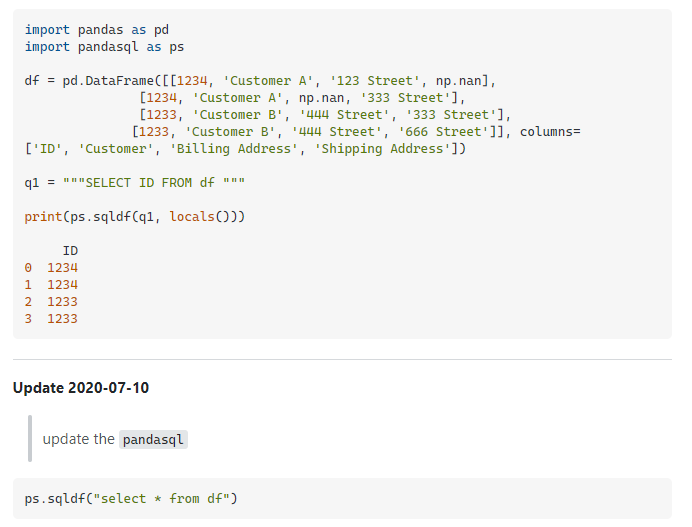


------------------------
------------------------

### Back to Fuguesql

- **fuggle** is a library for Fugue on `Kaggle notebooks` 
- Installating fugue for use outside Kaggle notebooks should just be `pip install fugue`

> ref: https://www.kaggle.com/kvnkho/fugue-workshop

In [ ]:
%pip install fuggle -q

In [ ]:
from fuggle import setup
setup()

In [ ]:
df = pd.DataFrame({"A": [1, 2, 3, 4], "col2": list("abcd")})
df

- **`%%fsql magic lets you use fugue in jupyter-NB`**

In [ ]:
%%fsql
SELECT * FROM df
WHERE A = 3

PRINT

- **`fsql : using python variable`**

In [ ]:
# variable
cutoff  =  2

In [ ]:
%%fsql
SELECT * FROM df
WHERE A > {{cutoff}}

PRINT

<a id = "31"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">🚀Pandarallel</p>

- The idea of `Pandaral·lel` is to distribute your pandas calculation over all available CPUs on your computer to get a significant speed increase.

- **In this case we are getting 2X speed gains**
------------------

- On Windows, Pandaral·lel will works only if the Python session (python, ipython, jupyter notebook, jupyter lab, ...) is executed from `Windows Subsystem for Linux (WSL)`
- On Linux & macOS, nothing special has to be done.

---------------------
> ref: https://towardsdatascience.com/pandaral-lel-a-simple-and-efficient-tool-to-parallelize-your-pandas-operations-on-all-your-cpus-bb5ff2a409ae

> ref: https://github.com/nalepae/pandarallel

-------------------

> Why Pandarallel, why not Dask? 

> Maybe becuase it lets you use pandas like functionality. honestly, I have not explored the comparison b/w the two!

In [ ]:
pip install pandarallel -q

In [ ]:
# Import
from pandarallel import pandarallel

# Initialization
pandarallel.initialize(progress_bar = True)

In [ ]:
df_size = int(5e5)
df = pd.DataFrame(dict(a=np.random.randint(1, 8, df_size),
                       b=np.random.rand(df_size)))

df.shape

In [ ]:
def func(x):
    return np.sin(x.a**2) + np.sin(x.b**2)

### Benchmark
- Let's benchmark pandas `progress_apply` to pandarallel's `parallel_apply`
- we know that kaggle kernel offer `4 cpu-cores`
-----------------
- we can observe there's a `2x` gain in performance

In [ ]:
%%time
res = df.progress_apply(func, axis=1)

In [ ]:
%%time
res_parallel = df.parallel_apply(func, axis=1)

<a id = "32"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Dataframe - style </p>

- We can create beautiful dataframe outputs by using `style`
- There are a ton of customizations we can do, I leave that to you!  

In [ ]:
df = pd.DataFrame({"A" :[1,2,3,5], "B" : list("pqrs")})

In [ ]:
df.style.set_properties(**{'background-color': 'grey',
                           'color': 'white',
                           'border-color': 'white'})

<a id = "33"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">⚡Markdown</p>

- Want your `code/print outputs` to have `beautiful formatting` like `Markdowns`

> This is a post by me only (not a self promotion). self promotion comes later😁

https://www.kaggle.com/general/302872

<a id = "34"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">☑️Searborn formatting in Matplotlib plots</p>

- `sns.set_theme()`  : lets us use `Seaborn formatting` while using `Matplotlib api` for plotting 

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [ ]:
data = np.random.randn(100)

In [ ]:
plt.title("matplotlib plot without seaborn formatting")
ax = plt.hist(data)

In [ ]:
# Apply the default theme
sns.set_theme()

plt.title("matplotlib plot with seaborn formatting")
ax = plt.hist(data)

<a id = "35"> </a>
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Pandas profiling</p>

`pandas_profiling` can generate a basic report on the input DataFrame (useful for basic `EDA`) 

----------------

I dont recommend using `Pandas Profiling` for larger datasets

In [ ]:
# importing packages
import pandas as pd
import pandas_profiling as pp


# dictionary of data
dct = {'ID': {0: 23, 1: 43, 2: 12, 3: 13,4: 67, 5: 89, 6: 90, 7: 56,8: 34},
'Name': {0: 'Ram', 1: 'Deep', 2: 'Yash',3: 'Aman', 4: 'Arjun', 5: 'Aditya',6: 'Divya', 7: 'Chalsea',8: 'Akash' },
'Marks': {0: 89, 1: 97, 2: 45, 3: 78,4: 56, 5: 76, 6: 100, 7: 87,8: 81},
'Grade': {0: 'B', 1: 'A', 2: 'F', 3: 'C',4: 'E', 5: 'C', 6: 'A', 7: 'B',8: 'B'}}

In [ ]:
# forming dataframe and printing
data = pd.DataFrame(dct)
display(data)

In [ ]:
# forming ProfileReport and save
# as output.html file
profile = pp.ProfileReport(data)
profile.to_file("output.html")

In [ ]:
profile


<u>Need more tricks</u>
https://www.dataschool.io/python-pandas-tips-and-tricks/

---------------------
# <p style="background-color:#535353;font-family:newtimeroman;color:#FFF9ED;font-size:250%;text-align:center;border-radius:10px 10px;">Thanks & Feedback</p>

<div class="alert alert-info" role="alert">
<h3>Please checkout my other work too! </h3> 
</div>